In [ ]:
from google.colab import files
files.upload()  # kaggle.json faylini yuklash uchun

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ubaydullayevno1","key":"adead398ea69ce56a9d87675ae180faf"}'}

In [ ]:
import os
!mkdir -p ~/.kaggle  # Kaggle katalogini yaratish
!mv kaggle.json ~/.kaggle/  # Faylni to‘g‘ri joyga ko‘chirish
!chmod 600 ~/.kaggle/kaggle.json  # Ruxsat o‘rnatish


In [ ]:
!kaggle datasets download -d asrafulme/800-cotton-leaf


Dataset URL: https://www.kaggle.com/datasets/asrafulme/800-cotton-leaf
License(s): unknown
100% 817M/817M [00:21<00:00, 41.9MB/s]
100% 817M/817M [00:21<00:00, 39.6MB/s]


In [ ]:
!unzip 800-cotton-leaf.zip

Archive:  800-cotton-leaf.zip
  inflating: 40 Images/Aphids/1.jpg  
  inflating: 40 Images/Aphids/10.jpg  
  inflating: 40 Images/Aphids/11.jpg  
  inflating: 40 Images/Aphids/12.jpg  
  inflating: 40 Images/Aphids/13.jpg  
  inflating: 40 Images/Aphids/14.jpg  
  inflating: 40 Images/Aphids/15.jpg  
  inflating: 40 Images/Aphids/16.jpg  
  inflating: 40 Images/Aphids/17.jpg  
  inflating: 40 Images/Aphids/18.jpg  
  inflating: 40 Images/Aphids/19.jpg  
  inflating: 40 Images/Aphids/2.jpg  
  inflating: 40 Images/Aphids/20.jpg  
  inflating: 40 Images/Aphids/21.jpg  
  inflating: 40 Images/Aphids/22_.jpg  
  inflating: 40 Images/Aphids/23.jpg  
  inflating: 40 Images/Aphids/24_.jpg  
  inflating: 40 Images/Aphids/25.jpg  
  inflating: 40 Images/Aphids/26.jpg  
  inflating: 40 Images/Aphids/27.jpg  
  inflating: 40 Images/Aphids/28.jpg  
  inflating: 40 Images/Aphids/29.jpg  
  inflating: 40 Images/Aphids/3.jpg  
  inflating: 40 Images/Aphids/30.jpg  
  inflating: 40 Images/Aphids/31.jp

In [ ]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (53.9 kB/s)
Selecting previously unselected package tree.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!tree -L 1 "/content/40 Images"

/content/40 Images
├── Aphids
├── Army worm
├── Bacterial blight
├── Healthy
├── Powdery mildew
└── Target spot

6 directories, 0 files


Resize natijasi qanaqa bo'lishi

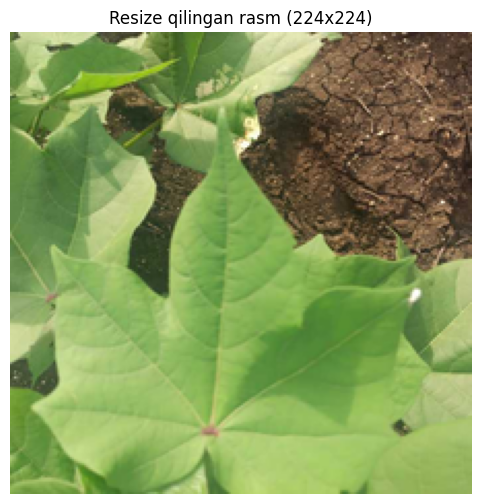

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Rasmni ochish
img = Image.open("/content/40 Images/Healthy/24.jpg")

# Faqat resize qilish
# Image.ANTIALIAS o'rniga Image.Resampling.LANCZOS ishlatamiz
img_resized = img.resize((224, 224), Image.Resampling.LANCZOS)

# Natijani ko'rish
plt.figure(figsize=(6,6))
plt.imshow(img_resized)
plt.title("Resize qilingan rasm (224x224)")
plt.axis("off")
plt.show()

ASL rasmlarni o'lchami

In [ ]:
import os
from PIL import Image

# Dataset joylashgan papkani kiriting
dataset_dir = "/content/40 Images"

# Papka bo'ylab aylanish va rasm o'lchamlarini olish
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            img_path = os.path.join(root, file)
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    print(f"{img_path}: {width}x{height}")
            except Exception as e:
                print(f"Error opening {img_path}: {e}")


/content/40 Images/Powdery mildew/rotate_zoompil_constract_39.jpg: 634x718
/content/40 Images/Powdery mildew/vertical_flip5.jpg: 792x637
/content/40 Images/Powdery mildew/random_crop_pil_constract_14.jpg: 400x400
/content/40 Images/Powdery mildew/rotate_zoompil_constract_22.jpg: 246x258
/content/40 Images/Powdery mildew/vertical_flippil_brightness_23.jpg: 216x196
/content/40 Images/Powdery mildew/pil_constract_9.jpg: 684x444
/content/40 Images/Powdery mildew/random_crop_pil_sharpness_39.jpg: 400x400
/content/40 Images/Powdery mildew/random_crop_pil_constract_23.jpg: 400x400
/content/40 Images/Powdery mildew/random_crop_pil_constract_3.jpg: 400x400
/content/40 Images/Powdery mildew/vertical_flippil_color_13.jpg: 457x313
/content/40 Images/Powdery mildew/pil_brightness_16.jpg: 1165x686
/content/40 Images/Powdery mildew/random_crop_pil_sharpness_15.jpg: 400x400
/content/40 Images/Powdery mildew/random_crop_pil_color_3.jpg: 400x400
/content/40 Images/Powdery mildew/rotate_zoompil_color_19.

 Kutubxonalarni import qilish

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


Gpuga ulanganligini tekshirish

In [ ]:
# 1. GPU mavjudligini tekshirish
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available:", gpus)
else:
    print("GPU is not available. Please enable GPU in Runtime -> Change runtime type.")

GPU is available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1  # 20% validation uchun
)

# Training set
train_generator = train_datagen.flow_from_directory(
    "/content/40 Images",
    target_size=(224, 224),  # EfficientNetB0 uchun mos o'lcham
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation set
validation_generator = train_datagen.flow_from_directory(
    "/content/40 Images",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4310 images belonging to 6 classes.
Found 478 images belonging to 6 classes.


Model qurish

In [ ]:
# EfficientNetB0 ni ImageNet og'irliklari bilan yuklab olish, ustki qismini olib tashlash
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Dastlab baza qatlamlarini muzlatamiz

# Qo'shimcha qatlamlar qo'shamiz:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)  # Overfittingni kamaytirish uchun
predictions = Dense(6, activation='softmax')(x)  # 6 sinf uchun chiqish qatlam

# Modelni hosil qilamiz
model = Model(inputs=base_model.input, outputs=predictions)

# Modelni kompilyatsiya qilish
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 5. Callbacks sozlash: EarlyStopping va ModelCheckpoint
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('efficientnetb0_best.h5', save_best_only=True)
]


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,057,257 (15.48 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
# 6. Modelni trening qilish (initial training)
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=callbacks
)

# BOSHQACHA USUL BILAN

In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
BASE_DIR = '/content/40 Images'
IMG_SIZE = 224  # VGG turidagi model uchun
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 6  # 6 ta sinf (5 ta kasallik + sog'lom)
BASE_DIR="/content/40 Images"

In [ ]:
# Dataset generatorlarini tayyorlash (80% training, 20% validation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.2
)

# Training va validation generatorlari
train_generator = train_datagen.flow_from_directory(
    BASE_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    BASE_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Sinf nomlari va indekslari
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
print("Sinflar:", class_names)


Found 3831 images belonging to 6 classes.
Found 957 images belonging to 6 classes.
Sinflar: ['Aphids', 'Army worm', 'Bacterial blight', 'Healthy', 'Powdery mildew', 'Target spot']


In [ ]:
model = Sequential([
    # 1-convolutional block
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # 2-convolutional block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # 3-convolutional block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Fully connected qismi
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Overfitting oldini olish uchun
    Dense(NUM_CLASSES, activation='softmax')  # 6 ta sinf uchun
])

# Modelni kompilyatsiya qilish
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Modelni ko'rsatish
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,978,918 (99.10 MB)

 Trainable params: 25,978,918 (99.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoint = ModelCheckpoint(
    'best_cotton_disease_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
# Modelni o'qitish
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.1959 - loss: 1.8991
Epoch 1: val_accuracy improved from -inf to 0.32184, saving model to best_cotton_disease_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 120s 863ms/step - accuracy: 0.1963 - loss: 1.8979 - val_accuracy: 0.3218 - val_loss: 1.5882
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.3523 - loss: 1.5709
Epoch 2: val_accuracy improved from 0.32184 to 0.47753, saving model to best_cotton_disease_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 82s 680ms/step - accuracy: 0.3525 - loss: 1.5706 - val_accuracy: 0.4775 - val_loss: 1.3345
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.4659 - loss: 1.3582
Epoch 3: val_accuracy improved from 0.47753 to 0.61546, saving model to best_cotton_disease_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 78s 650ms/step - accuracy: 0.4660 - loss: 1.3580 - val_accuracy: 0.6155 - val_loss: 1.0287
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.5445 - loss: 1.1873
Epoch 4: val_accuracy improved from 0.61546 to 0.64159, saving model to best_cotton_disease_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 80s 666ms/step - accuracy: 0.5445 - loss: 1.1872 - val_accuracy: 0.6416 - val_loss: 0.9389
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.5555 - loss: 1.1485
Epoch 5: val_accuracy improved from 0.64159 to 0.70951, saving model to best_cotton_disease_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 86s 718ms/step - accuracy: 0.5557 - loss: 1.1482 - val_accuracy: 0.7095 - val_loss: 0.8489
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.6047 - loss: 1.0401
Epoch 6: val_accuracy improved from 0.70951 to 0.73668, saving model to best_cotton_disease_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 84s 701ms/step - accuracy: 0.6048 - loss: 1.0399 - val_accuracy: 0.7367 - val_loss: 0.7345
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.6589 - loss: 0.9339
Epoch 7: val_accuracy did not improve from 0.73668
120/120 ━━━━━━━━━━━━━━━━━━━━ 74s 620ms/step - accuracy: 0.6590 - loss: 0.9337 - val_accuracy: 0.7116 - val_loss: 0.7639
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.6603 - loss: 0.9319
Epoch 8: val_accuracy improved from 0.73668 to 0.78892, saving model to best_cotton_disease_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 81s 678ms/step - accuracy: 0.6605 - loss: 0.9313 - val_accuracy: 0.7889 - val_loss: 0.6313
Epoch 9/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.7195 - loss: 0.7914
Epoch 9: val_accuracy did not improve from 0.78892
120/120 ━━━━━━━━━━━━━━━━━━━━ 81s 670ms/step - accuracy: 0.7194 - loss: 0.7916 - val_accuracy: 0.7837 - val_loss: 0.6497
Epoch 10/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.7383 - loss: 0.7513
Epoch 10: val_accuracy did not improve from 0.78892
120/120 ━━━━━━━━━━━━━━━━━━━━ 79s 655ms/step - accuracy: 0.7383 - loss: 0.7512 - val_accuracy: 0.7816 - val_loss: 0.5898
Epoch 11/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.7560 - loss: 0.6626
Epoch 11: val_accuracy improved from 0.78892 to 0.80669, saving model to best_cotton_disease_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 84s 697ms/step - accuracy: 0.7560 - loss: 0.6626 - val_accuracy: 0.8067 - val_loss: 0.5135
Epoch 12/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.7572 - loss: 0.7025
Epoch 12: val_accuracy improved from 0.80669 to 0.85371, saving model to best_cotton_disease_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 82s 683ms/step - accuracy: 0.7573 - loss: 0.7022 - val_accuracy: 0.8537 - val_loss: 0.4224
Epoch 13/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.7570 - loss: 0.6693
Epoch 13: val_accuracy improved from 0.85371 to 0.87147, saving model to best_cotton_disease_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 78s 652ms/step - accuracy: 0.7571 - loss: 0.6692 - val_accuracy: 0.8715 - val_loss: 0.3773
Epoch 14/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.8028 - loss: 0.5480
Epoch 14: val_accuracy improved from 0.87147 to 0.87461, saving model to best_cotton_disease_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 82s 681ms/step - accuracy: 0.8027 - loss: 0.5483 - val_accuracy: 0.8746 - val_loss: 0.3616
Epoch 15/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.8248 - loss: 0.5011
Epoch 15: val_accuracy improved from 0.87461 to 0.89551, saving model to best_cotton_disease_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 82s 683ms/step - accuracy: 0.8247 - loss: 0.5013 - val_accuracy: 0.8955 - val_loss: 0.3339
Epoch 16/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.8038 - loss: 0.5456
Epoch 16: val_accuracy did not improve from 0.89551
120/120 ━━━━━━━━━━━━━━━━━━━━ 75s 624ms/step - accuracy: 0.8038 - loss: 0.5457 - val_accuracy: 0.8819 - val_loss: 0.3423
Epoch 17/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.8332 - loss: 0.4714
Epoch 17: val_accuracy did not improve from 0.89551
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 636ms/step - accuracy: 0.8332 - loss: 0.4714 - val_accuracy: 0.8955 - val_loss: 0.3242
Epoch 18/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.8220 - loss: 0.4820
Epoch 18: val_accuracy improved from 0.89551 to 0.90700, saving model to best_cotton_disease_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 81s 679ms/step - accuracy: 0.8220 - loss: 0.4820 - val_accuracy: 0.9070 - val_loss: 0.2596
Epoch 19/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.8343 - loss: 0.4952
Epoch 19: val_accuracy improved from 0.90700 to 0.92163, saving model to best_cotton_disease_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 81s 675ms/step - accuracy: 0.8344 - loss: 0.4950 - val_accuracy: 0.9216 - val_loss: 0.2403
Epoch 20/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.8634 - loss: 0.4081
Epoch 20: val_accuracy did not improve from 0.92163
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 625ms/step - accuracy: 0.8634 - loss: 0.4081 - val_accuracy: 0.9175 - val_loss: 0.2528
Restoring model weights from the end of the best epoch: 19.


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.8492 - loss: 0.4737
Epoch 1: val_accuracy improved from -inf to 0.93939, saving model to improved_cotton_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 81s 674ms/step - accuracy: 0.8492 - loss: 0.4735 - val_accuracy: 0.9394 - val_loss: 0.1756
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.8761 - loss: 0.3384
Epoch 2: val_accuracy did not improve from 0.93939
120/120 ━━━━━━━━━━━━━━━━━━━━ 73s 604ms/step - accuracy: 0.8761 - loss: 0.3386 - val_accuracy: 0.9060 - val_loss: 0.2836
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.8757 - loss: 0.3561
Epoch 3: val_accuracy did not improve from 0.93939
120/120 ━━━━━━━━━━━━━━━━━━━━ 73s 607ms/step - accuracy: 0.8757 - loss: 0.3560 - val_accuracy: 0.9310 - val_loss: 0.2070
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.8772 - loss: 0.3518
Epoch 4: val_accuracy did not improve from 0.93939
120/120 ━━━━━━━━━━━━━━━━━━━━ 74s 614ms/step - accuracy: 0.8772 - loss: 0.3518 - val_accuracy: 0.9363 - val_loss: 0.1794
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.8844 - loss: 0.3621
Epoch 5: val_ac

120/120 ━━━━━━━━━━━━━━━━━━━━ 79s 656ms/step - accuracy: 0.8928 - loss: 0.3052 - val_accuracy: 0.9488 - val_loss: 0.1470
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.8769 - loss: 0.3556
Epoch 7: val_accuracy did not improve from 0.94880
120/120 ━━━━━━━━━━━━━━━━━━━━ 73s 612ms/step - accuracy: 0.8769 - loss: 0.3554 - val_accuracy: 0.9342 - val_loss: 0.1989
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.8942 - loss: 0.3158
Epoch 8: val_accuracy did not improve from 0.94880
120/120 ━━━━━━━━━━━━━━━━━━━━ 73s 611ms/step - accuracy: 0.8941 - loss: 0.3160 - val_accuracy: 0.9488 - val_loss: 0.1460
Epoch 9/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.9156 - loss: 0.2434
Epoch 9: val_accuracy improved from 0.94880 to 0.95925, saving model to improved_cotton_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 78s 655ms/step - accuracy: 0.9155 - loss: 0.2436 - val_accuracy: 0.9592 - val_loss: 0.1110
Epoch 10/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.8977 - loss: 0.3013
Epoch 10: val_accuracy did not improve from 0.95925
120/120 ━━━━━━━━━━━━━━━━━━━━ 73s 604ms/step - accuracy: 0.8978 - loss: 0.3012 - val_accuracy: 0.9519 - val_loss: 0.1617
Restoring model weights from the end of the best epoch: 9.


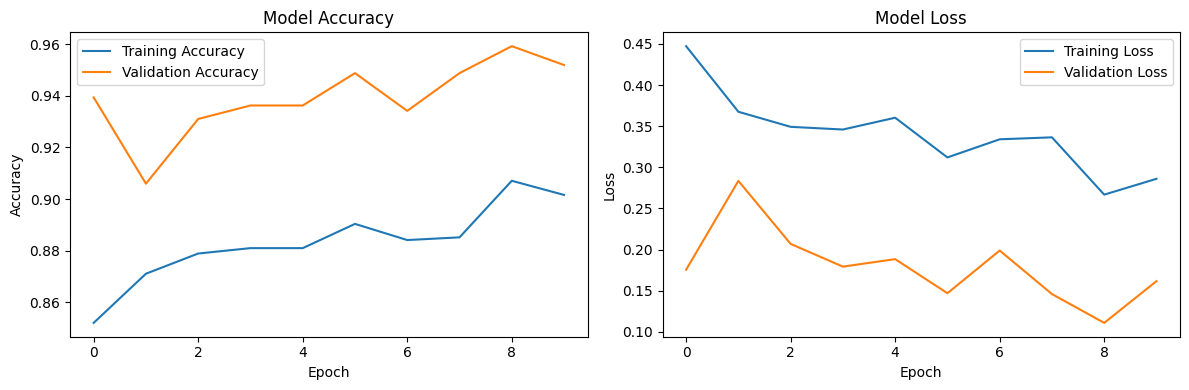

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy grafigi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss grafigi
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
import os